<a href="https://colab.research.google.com/github/r5racker/012_RahilBhensdadia/blob/main/Lab_04_2_classifying_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from subprocess import call

In [11]:
wine_data = datasets.load_wine()
ds = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
print(f"#examples :{ds.shape[0]} and #features: {ds.shape[1]}")

#examples :178 and #features: 13


In [13]:
print(ds.head())
print("\n\nFeatures:", wine_data.feature_names)
print("\nLabels:", np.unique(wine_data.target_names))

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]


Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Labels: ['class_0' 'class_1' 'class_2']


**Splitting the dataset for training(80%) and testing(20%).
Random state = 12 (Roll No. 12)**


In [14]:
x_train, x_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, test_size = 0.20, random_state = 12)

In [15]:
#creating instance of classifier and performing training
dtclassifier = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 10)
dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Testing**

In [17]:
# Testing
y_prediction = dtclassifier.predict(x_test)

#  Accuracy
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:\n", accuracy)

#  Confusion Matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("\nConfusion Matrix:\n",c_matrix)

#  Precision
precision = precision_score(y_test, y_prediction, average=None)
print("\nPrecision Score:\n", precision)

#  Recall
recall = recall_score(y_test, y_prediction, average=None)
print("\nRecall Score:\n", recall)

Accuracy Score:
 0.8611111111111112

Confusion Matrix:
 [[12  2  0]
 [ 1 10  0]
 [ 2  0  9]]

Precision Score:
 [0.8        0.83333333 1.        ]

Recall Score:
 [0.85714286 0.90909091 0.81818182]


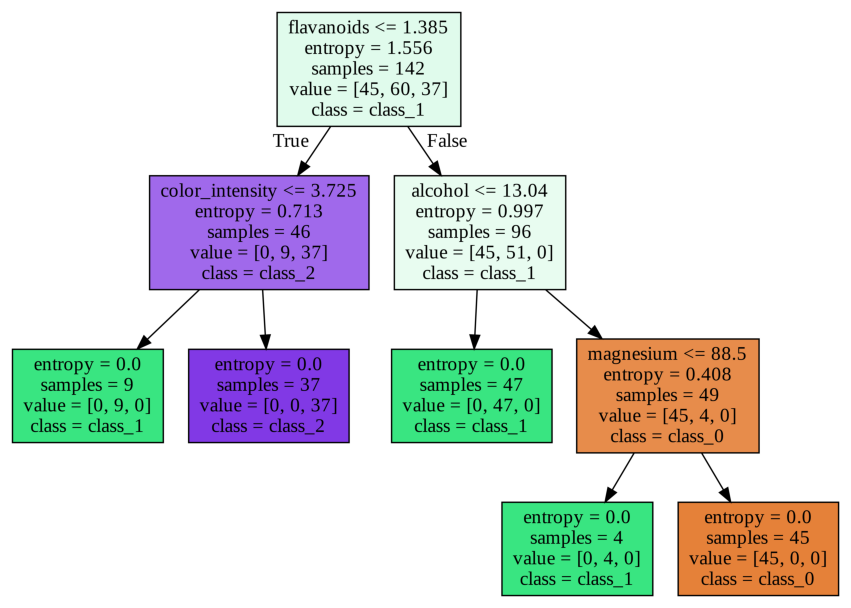

In [23]:
export_graphviz(dtclassifier, out_file='wine_tree.dot',
                feature_names=list(wine_data.feature_names),
               class_names=list(wine_data.target_names),
                filled=True)

# Convert to png
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])
plt.figure(figsize = (15, 20))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()